In [1]:
from utils.input_output import Inputs
from utils.packages import *

In [2]:
inputs = Inputs('./input', 'train.csv', 'test.csv')
inputs.load_all_df()

Reading 1460 rows and 81 columns from ./input/train.csv.
Reading 1459 rows and 80 columns from ./input/test.csv.


In [3]:
df = inputs.data_dict['train']
df_test = inputs.data_dict['test']

In [4]:
set(df.columns) - set(df_test.columns)

{'SalePrice'}

In [6]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
num_cols = []
str_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        str_cols.append(col)
    else:
        num_cols.append(col)

In [12]:
df[num_cols].isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

(array([ 42.,   0.,   6.,  31.,  25.,  34., 112., 205., 475., 252., 136.,
         77.,  37.,  14.,   7.,   5.,   0.,   0.,   0.,   2.]),
 array([3.04452244, 3.17960648, 3.31469051, 3.44977455, 3.58485859,
        3.71994263, 3.85502666, 3.9901107 , 4.12519474, 4.26027878,
        4.39536281, 4.53044685, 4.66553089, 4.80061493, 4.93569896,
        5.070783  , 5.20586704, 5.34095108, 5.47603512, 5.61111915,
        5.74620319]),
 <BarContainer object of 20 artists>)

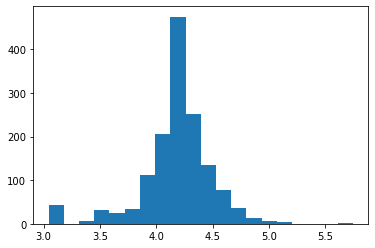

In [24]:
def log_transform(df, col, change_inplace=False):
    s = np.log(df[col])
    if s.isnull().sum() > 0:
        s = np.where(s.isnull(), s.mean(), s)
    if change_inplace:
        df[col] = s
    return s
    
plt.hist(log_transform(df, 'LotFrontage'), bins=20)

In [25]:
log_transform(df, 'LotFrontage', True)

array([4.17438727, 4.38202663, 4.21950771, ..., 4.18965474, 4.21950771,
       4.31748811])

In [26]:
df.LotFrontage

0       4.174387
1       4.382027
2       4.219508
3       4.094345
4       4.430817
          ...   
1455    4.127134
1456    4.442651
1457    4.189655
1458    4.219508
1459    4.317488
Name: LotFrontage, Length: 1460, dtype: float64

<AxesSubplot:>

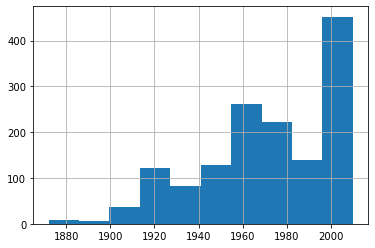

In [27]:
df.YearBuilt.hist()

In [30]:
2011 - df.YearBuilt

0        8
1       35
2       10
3       96
4       11
        ..
1455    12
1456    33
1457    70
1458    61
1459    46
Name: YearBuilt, Length: 1460, dtype: int64